# ALDS Tutorial 1: time complexity, en het meten van runtime in de praktijk

Welkom bij de eerste tutorial van ALDS! In deze tutorial gaan wij kijken naar de time-complexity van algoritmes.  Ook gaan de runtime en het aantal function calls bij recursie doormeten, en deze vergelijken met de complexity-resultaten. We moeten daarbij in acht nemen dat de complixiteitsanalyse uitgaat van worst-case input, en dat metingen in de praktijk sterk zullen afhangen van de data (vaak gegenereerd) die we gebruiken om de meting te doen. 

Er wordt steeds eerst uitleg en voorbeeldcode gegeven. Daarna volgen opgaven. Die zijn duidelijk gemarkeerd. 

Laten we eerst even beginnen met het controleren van de installatie. Als het goed is moet je by IPython dezelfde versie krijgen van Python als die die je krijgt als je op de command line Python3 start. Zo nee, update Jupyter dan (of herinstalleer deze) aangezien het niet automatisch de nieuwste python-installatie op je systeem gebruikt. Dit kan erg vervelend worden als je libraries wil gebruiken die je nu nog wil toevoegen.  

LET OP: bij IPython notebooks, zoals deze, is het belangrijk om de **cellen** allemaal uit te voeren. Dit door je voor een individuele cell met SHIFT+ENTER. Als je meerdere cellen (in volgorde) uit wil voeren, staan er verschillende opties onder het dropmenu "cell", zoals bijvoorbeeld "Run All Above" (een van mijn persoonlijke favorieten). Succes!

~ DMYR

In [14]:
import sys

# Asserts zijn handig: ingebouwde unit-testjes in Python
assert sys.version_info.major == 3, "You need python 3."
print("Python version is {} -> okay".format(sys.version_info[0:30]))

import IPython

assert IPython.version_info[0] >= 7, "You need IPython >= 7"
print("IPython version is {} -> okay".format(IPython.version_info))


Python version is (3, 11, 5, 'final', 0) -> okay
IPython version is (8, 17, 2, '') -> okay


Alles oké? Mooi laten we dan doorgaan met het importeren van libraries, en een aantal functies definiëren die we gaan gebruiken om mooie plotjes te maken en metingen te doen.

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats

# numpy arrays zijn daadwerkelijk arrays, geen Python lists, dus die gebruiken we.
def random_int_array(length):
    # een array'tje met ints tussen de 0 en de 100 (exclusief)
    array = np.random.randint(0, high=100, size=length, dtype="l")
    return array


# Deze functie implementeert het max1 algoritme uit de reader
def my_max(int_array):
    # in de reader staat min oneindig, maar dit werkt ook en is eigenlijk beter => implementatiedetail
    result = int_array[0]
    l = len(int_array)
    for i in range(l):
        # de ternary operator in Python is bijna natuurlijke taal
        result = result if int_array[i] <= result else int_array[i]
    return result


# En even een klein testje
arr = random_int_array(5)
assert max(arr) == my_max(arr), "Hé, die implementatie klopt niet, maat!"
print(str(max(arr)) + "==" + str(my_max(arr)) + ", inderdaad!")

t1 = time.perf_counter()
res = max(arr)
t2 = time.perf_counter()
print("De standaard max deed er " + str(t2 - t1) + "s over.")
t1 = time.perf_counter()
res = my_max(arr)
t2 = time.perf_counter()
print("Onze max1-implementatie deed er " + str(t2 - t1) + "s over")
print(
    "Hé onze implementatie lijkt (ten minste op mijn machine) wel iets sneller",
    "-- voor de meeste random seeds dan... apart?!",
    sep="\n",
)
t1 = time.perf_counter()
res = np.max(arr)
t2 = time.perf_counter()
print(
    "De numpy library heeft ook nog een max, die deed er "
    + str(t2 - t1)
    + "s over. Hè, weer anders?!"
)
print(
    "Maar goed, één meting is natuurlijk nog geen bewíj́s.",
    "En we hebben bovendien maar één lengte getest. Dat kan beter!",
    sep="\n",
)


89==89, inderdaad!
De standaard max deed er 7.890000006227638e-05s over.
Onze max1-implementatie deed er 5.3700000080425525e-05s over
Hé onze implementatie lijkt (ten minste op mijn machine) wel iets sneller
-- voor de meeste random seeds dan... apart?!
De numpy library heeft ook nog een max, die deed er 0.0001055000000178552s over. Hè, weer anders?!
Maar goed, één meting is natuurlijk nog geen bewíj́s.
En we hebben bovendien maar één lengte getest. Dat kan beter!


In de vorige cell hebben we de implementatie van max1 met maar één metinkje vergeleken met de standaard python max, en de standaard numpy max. Dat is alleen natuurlijk niet echt een nette manier om runtime te meten. Eigenlijk moeten we dit netjes systematisch aanpakken. Dat wil zeggen:
* Meerdere metingen doen
* Voor meerdere inputgroottes (in dit geval de lengte van de array) 
* En zowel het gemiddelde, als de standaardafwijking (=standaarddeviatie) bekijken

De standaardafwijking is hoeveel een meting gemiddeld van het gemiddelde afwijkt. 

De onderstaande code maakt zo'n systematische vergelijking tussen de runtimes van de twee algoritmes. Let op dat: 
* De twee functies worden vergeleken op verschillende groottes arrays (die in "meetpunten") staan. Specifiek: van 5 tot en met 250 in stappen van 5.
* De twee functies altijd op **dezelfde** input vergeleken worden. Dit is nodig, want anders is de vergelijking minder eerlijk. 
* We de functie time.perf_counter() gebruiken om de meting te doen. Deze geeft de tijd in seconden, maar gelukkig niet afgerond op hele seconden. Hij is vrij precies. 
* We zowel de gemiddelden (mean) van beide algoritmes uitrekenen, als de standaarddeviatie. Dit plotten we als een error region (tussen het gemiddelde min, en het gemiddelde plus, de standaardafwijking). Zo kunnen we makkelijk een indruk krijgen van of de verschillen tussen de algoritmes wel significant zijn. 
* We gebruiken de statistics library (hierboven geïmporteerd als "stats") voor deze statistische functions. 
* De plotcode is met matplotlib.pyplot gemaakt (geïmporteerd als "plt"). Voor meer info over deze library, zie: https://matplotlib.org/tutorials/introductory/pyplot.html 
* We zetten altijd op de assen wat we tegen elkaar afzetten, en we voegen een legenda toe aan het plaatje. 


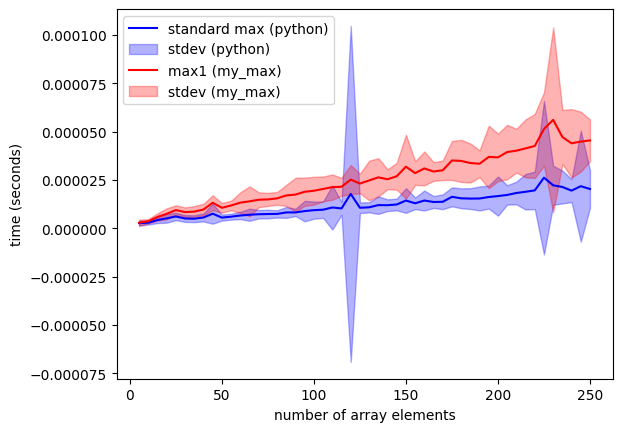

Ah, kennelijk was onze implementatie toch niet echt sneller...
Voor hele kleine arrays doet hij het misschien net ietsje beter, maar zeker niet voor grotere inputs.


In [4]:
mean_std_max = []
stdev_std_max = []
mean_my_max = []
stdev_my_max = []
meetpunten = list(range(5, 251, 5))
for i in meetpunten:
    std = []
    my = []
    for j in range(200):  # vijftig metingen per datapunt
        arr = random_int_array(i)
        t1 = time.perf_counter()
        res = max(arr)
        t2 = time.perf_counter()
        std.append(t2 - t1)
        t1 = time.perf_counter()
        res = my_max(arr)
        t2 = time.perf_counter()
        my.append(t2 - t1)
    mean_std_max.append(stats.mean(std))
    stdev_std_max.append(stats.stdev(std))
    mean_my_max.append(stats.mean(my))
    stdev_my_max.append(stats.stdev(my))

# En dan de plot-code gemaakt met Matplotlib
# Zie bijvoorbeeld de tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(meetpunten, mean_std_max, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_std_max) - np.array(stdev_std_max),
    np.array(mean_std_max) + np.array(stdev_std_max),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_my_max, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_my_max) - np.array(stdev_my_max),
    np.array(mean_my_max) + np.array(stdev_my_max),
    color="r",
    alpha=0.3,
)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["standard max (python)", "stdev (python)", "max1 (my_max)", "stdev (my_max)"], loc="upper left")
plt.show()

print(
    "Ah, kennelijk was onze implementatie toch niet echt sneller...",
    "Voor hele kleine arrays doet hij het misschien net ietsje beter, maar zeker niet voor grotere inputs.",
    sep="\n",
)


Wat opvalt in de plot hierboven, is dat beide implementaties (de standaard Python max en my_max) een runtime hebben die lineair groeit met de grootte van de input. Beide implementaties implementeren dan ook een algoritme met een complexity van O(n). Het enige verschil is de constante voor de n, die we negeren bij runtime analyses. Dat is ook logisch, want de standaardmax en onze max1-implementatie zijn beide hetzelfde algoritme. Alleen maakt de standaard-max gebruik van een iterable, en is daardoor ietsje sneller voor grotere arrays. De reden dat hij in het begin misschien ietsje langzamer is is omdat de Python max allemaal fancy opties heeft die eerst even moeten worden afgevangen (in constante tijd): https://docs.python.org/3/library/functions.html#max   

## Opgave 1: Dat kan slechter

Implementeer de functie max2 (Algorithm 2) uit hoofdstuk 2 van de reader (https://canvas.hu.nl/courses/20230/files/1265942?module_item_id=430200), in de cell hieronder. Maak vervolgens een runtimevergelijkingsplot met max1 (my_max, zoals hierboven geïmplementeerd), op dezelfde manier als de code hierboven (vergeet niet de legenda aan te passen). 

Komt de plot overeen met je verwachting, gezien de runtime complexity van max2? (Graag beantwoorden in text (de markdown cell) onder je plotje.)

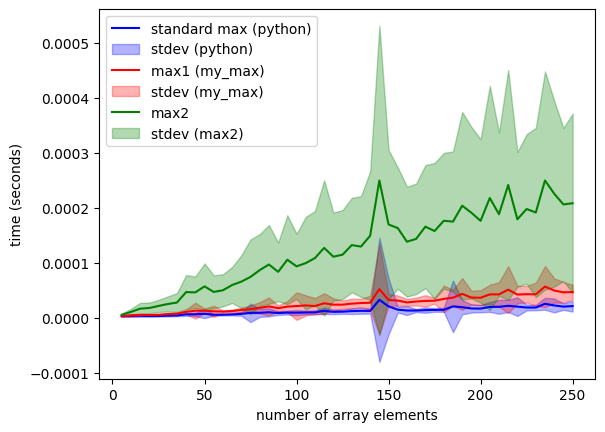

In [5]:
def max2(a):
    for i in range(0, len(a)-1):
        maxFound = True
        for j in range(0, len(a)):
            if a[i] < a[j]:
                maxFound = False
                break
        if maxFound:
            return a[i]   

mean_std_max = []
stdev_std_max = []
mean_my_max = []
stdev_my_max = []
mean_max2 = []
stdev_max2 = []
meetpunten = list(range(5, 251, 5))
for i in meetpunten:
    std = []
    my = []
    max2_times = []
    for j in range(200):  # vijftig metingen per datapunt
        arr = random_int_array(i)
        t1 = time.perf_counter()
        res = max(arr)
        t2 = time.perf_counter()
        std.append(t2 - t1)
        t1 = time.perf_counter()
        res = my_max(arr)
        t2 = time.perf_counter()
        my.append(t2 - t1)
        t1 = time.perf_counter()
        res = max2(arr)
        t2 = time.perf_counter()
        max2_times.append(t2 - t1)
    mean_std_max.append(stats.mean(std))
    stdev_std_max.append(stats.stdev(std))
    mean_my_max.append(stats.mean(my))
    stdev_my_max.append(stats.stdev(my))
    mean_max2.append(stats.mean(max2_times))
    stdev_max2.append(stats.stdev(max2_times))

# Plotting
plt.plot(meetpunten, mean_std_max, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_std_max) - np.array(stdev_std_max),
    np.array(mean_std_max) + np.array(stdev_std_max),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_my_max, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_my_max) - np.array(stdev_my_max),
    np.array(mean_my_max) + np.array(stdev_my_max),
    color="r",
    alpha=0.3,
)
plt.plot(meetpunten, mean_max2, "g-")
plt.fill_between(
    meetpunten,
    np.array(mean_max2) - np.array(stdev_max2),
    np.array(mean_max2) + np.array(stdev_max2),
    color="g",
    alpha=0.3,
)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["standard max (python)", "stdev (python)", "max1 (my_max)", "stdev (my_max)", "max2", "stdev (max2)"], loc="upper left")
plt.show()

jazeker, ik had al verwacht dat Max2 veel meer tijd zou kunnen, omdat hij een for loop in een for loop heeft.

## Opgave 2: Dat kan in verwachting beter, maar niet worst-case

In Python zit een standaard find-functie, d.w.z., een functie die de index van een gegeven waarde in een lijst teruggeeft: https://www.programiz.com/python-programming/methods/list/index
Dat is de functie **index** die hoort bij de class **list**. Deze functie is echter niet altijd even handig. Hij doet het ten eerste alleen op lijsten, en ten tweede, hij throwt een error als het de waarde er niet inzit. Vaak willen we dat niet, en gewoon een -1 returnen als de waarde er niet inzit.

Nu kunnen we daar natuurlijk best een lelijke hack voor maken en toch gebruik maken van de standaardimplementatie. 

In [6]:
def std_find(x, array):
    lst = list(array)
    try:
        i = lst.index(x)
    except:
        i = -1
    return i


std_find(9, np.array([1, 3, 4]))

assert std_find(9, np.array([1, 3, 4])) == -1, "Nee, die zit er niet in..."
assert std_find(4, np.array([1, 3, 4])) == 2, "Nee, die zit er juist wel in..."


Maar dat kunnen we natuurlijk ook niet doen... 

Implementeer een algoritme voor ***find***, dat de index van de éérste keer dat x in een array zit (dus de laagste index waarvoor array[index] == x) teruggeeft als x er daadwerkelijk inzit, en -1 als x er niet inzit. Je mag hierbij géén gebruik maken van standaard- en library-functies. Tip: let goed op dat je optijd returnt!

Wat is de time complexity van je algoritme (in big-Oh notatie)? Leg dit antwoord uit

Voer vervolgens twee testen uit, en plot daarvan de resultaten (met matplotlib, zoals hierboven gedaan voor max): 
* één test voor het vinden van een x tussen de 1 en de 99 (die er dus in kan zitten) in arrays gemaakt met functie random_int_array(i) (zoals hierboven gedefiniëerd). Variëer de lengtes van de array vanaf 5, en tot minstens 1000. Vergeet daarbij niet de meting te herhalen en zowel gemiddelde als de standaardafwijking uit te rekenen. 
* doe vervolgens nog een test volgens dezelfde meting als hierboven maar nu voor de *worst case*, in plaats van een integer tussen de 1 en de 99. Leg je beredenering uit voor wat de worst case is. 

Wat is de reden voor de verschillen die je ziet tussen de eerste en de tweede meting? 


(PS: voor degene die zich afvraagt hoe die Python-standaard en library functies eigenlijk zo snel zijn; er zit stiekem een hoop geoptimaliseerde code onder, vaak nog in C++ geschreven ook. Voor een heel mooi voorbeeld hiervan kan je proberen om deze opgave nogmaals te doen gebruik makend van de library functie np.where(array==x) (ja, ik weet het, rare syntax); je slaat stijl achterover hoe snel dat is.) 

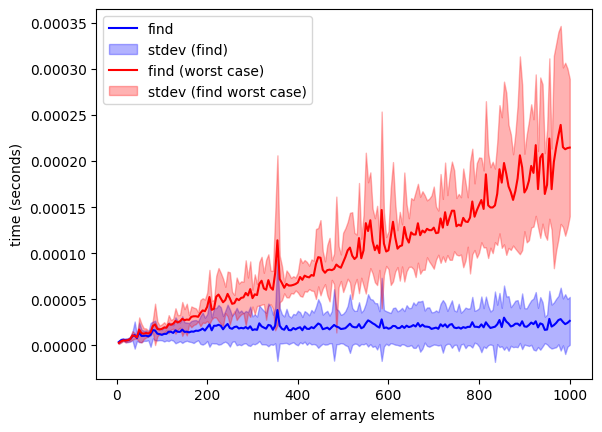

In [12]:
def find(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

mean_find = []
stdev_find = []
mean_find_worst = []
stdev_find_worst = []
meetpunten = list(range(5, 1001, 5))

for i in meetpunten:
    find_times = []
    find_worst_times = []
    for j in range(200):
        arr = random_int_array(i)
        x = np.random.randint(1, 100)
        t1 = time.perf_counter()
        res = find(arr, x)
        t2 = time.perf_counter()
        find_times.append(t2 - t1)

        t1 = time.perf_counter()
        res = find(arr, -1)  # 1000 is not in the array
        t2 = time.perf_counter()
        find_worst_times.append(t2 - t1)

    mean_find.append(stats.mean(find_times))
    stdev_find.append(stats.stdev(find_times))
    mean_find_worst.append(stats.mean(find_worst_times))
    stdev_find_worst.append(stats.stdev(find_worst_times))

plt.plot(meetpunten, mean_find, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_find) - np.array(stdev_find),
    np.array(mean_find) + np.array(stdev_find),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_find_worst, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_find_worst) - np.array(stdev_find_worst),
    np.array(mean_find_worst) + np.array(stdev_find_worst),
    color="r",
    alpha=0.3,
)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["find", "stdev (find)", "find (worst case)", "stdev (find worst case)"], loc="upper left")
plt.show()

**Big O** </br>
Big O notatie = O(n)</br>
**Verschillen**</br>
Het verschil tussen de twee is dat bij de rode lijn het getal niet te vinden is, dit zorgt ervoor dat elke keer dat er een getal meer komt, de loop langer duurt. Bij de blauwe lijn is dit niet het geval.

## Opgave 3: Dat kan beter!

Implementeer zowel de alleen recursieve (Algorithm 6 - recFibonacci, hoofdstuk 3 van de reader) als de recursieve met memoïsatie versie (Algorithm 7 - mFibonacci, hoofdstuk 4 van de reader) van het Fibonacci algoritme.

Een runtime-meting met verschillende inputgroottes (in dit geval alleen de grootte van de input-integer n), en plot de resultaten met gebruik van matplotlib. 

Doe nu nog een meting waarbij je het áántal functieaanroepen naar de functie die de Fibonacci-reeks uitrekent (Algorithm 6 en Algorithm 7) meet. (Oftewel, hoevaak wordt de recursie ingegaan). Plot wederom de resultaten met matplotlib. 

Zorg voor beide plotjes voor een nette legenda en de juiste labels op de assen. Vergeet ook niet de standaardafwijking te plotten met een error-region (zoals hierboven). 

Wat valt je op aan de beide metingen? Komt dit overeen met je verwachtingen met betrekking tot de runtime en het aantal function calls gegeven de runtime complexity analyse (big-Oh) in de reader (hoofdstuk 3 en 4))? 

mFibonacci: 377 753


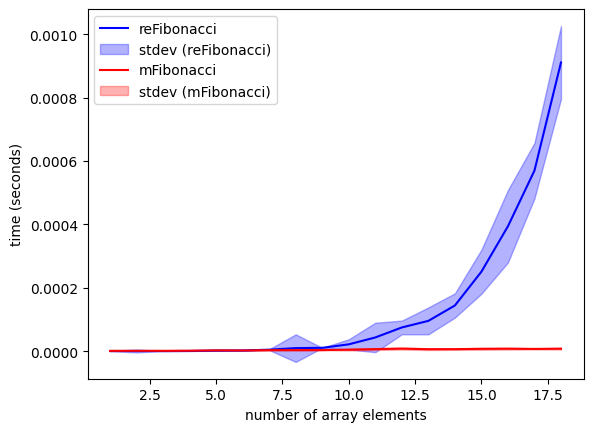

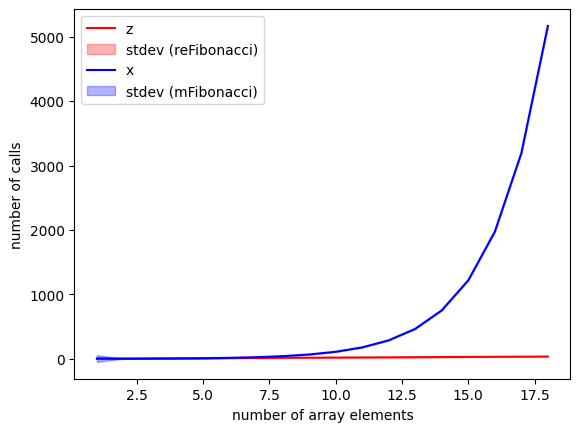

In [8]:
# schrijf hier je code voor opgave 3
x = 0
def reFibonacci(n):
    global x
    x += 1
    if n == 0:
        return 0
    elif n <= 2:
        return 1
    return reFibonacci(n-2) + reFibonacci(n-1)

z = 0
def mFibonacci(n, answers=None):
    global z
    z += 1
    if answers is None:
        answers = [-1] * (n + 1)
        answers[0] = 0
        answers[1] = 1
    if answers[n] == -1:
        answers[n] = mFibonacci(n - 2, answers) + mFibonacci(n - 1, answers)
    return answers[n]

print(f"mFibonacci: {reFibonacci(14)} {x}")

mean_find = []
stdev_find = []
mean_find_worst = []
stdev_find_worst = []

mean_countz = []
stdev_countz = []
mean_countx = []
stdev_countx = []
meetpunten = list(range(1, 19))

for i in meetpunten:
    find_times = []
    find_worst_times = []
    counterz = []
    counterx = []
    for j in range(200):
        t1 = time.perf_counter()
        res = reFibonacci(i)
        t2 = time.perf_counter()
        find_times.append(t2 - t1)
        counterz.append(z)
        z =0

        t1 = time.perf_counter()
        res = mFibonacci(i)
        t2 = time.perf_counter()
        find_worst_times.append(t2 - t1)
        counterx.append(x)
        x=0

    mean_find.append(stats.mean(find_times))
    stdev_find.append(stats.stdev(find_times))
    mean_find_worst.append(stats.mean(find_worst_times))
    stdev_find_worst.append(stats.stdev(find_worst_times))
    
    mean_countz.append(stats.mean(counterz))
    stdev_countz.append(stats.stdev(counterz))
    mean_countx.append(stats.mean(counterx))
    stdev_countx.append(stats.stdev(counterx))

plt.plot(meetpunten, mean_find, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_find) - np.array(stdev_find),
    np.array(mean_find) + np.array(stdev_find),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_find_worst, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_find_worst) - np.array(stdev_find_worst),
    np.array(mean_find_worst) + np.array(stdev_find_worst),
    color="r",
    alpha=0.3,
)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["reFibonacci", "stdev (reFibonacci)", "mFibonacci", "stdev (mFibonacci)"], loc="upper left")
plt.show()

plt.plot(meetpunten, mean_countz, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_countz) - np.array(stdev_countz),
    np.array(mean_countz) + np.array(stdev_countz),
    color="r",
    alpha=0.3,
)
plt.plot(meetpunten, mean_countx, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_countx) - np.array(stdev_countx),
    np.array(mean_countx) + np.array(stdev_countx),
    color="b",
    alpha=0.3,
)
plt.xlabel("number of array elements")
plt.ylabel("number of calls")
plt.legend(["z", "stdev (reFibonacci)", "x", "stdev (mFibonacci)"], loc="upper left")
plt.show()

**Wat valt je op**</br>
Het valt me op dat de recFibonacci er een stuk langer over doet, maar ook dat als er meer elementen zijn hij er veel veel langer over doet. </br>
**Komt dit overeen?** </br>
Het komt wel overeen met mijn verwachting, recFibonacci is 

## Opgave 4: En dan nog een lastig beestje (waarin we **alles** doen)

Schrijf een recursieve functie in Python die uitrekent in hoeveel unieke verschillende combinaties van munten en biljetten een bedrag (in eurocent) betaald kan worden. Maak hierbij gebruik van de euro-munten en biljetten. Dit zijn (in eurocenten):  1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000 and 10000.

Bijvoorbeeld, als wij 7 cent willen betalen zijn er 6 mogelijkheden:
* 7 = 1 + 1 + 1 + 1 + 1 + 1 + 1
* 7 = 1 + 1 + 1 + 1 + 1 + 2
* 7 = 1 + 1 + 1 + 2 + 2
* 7 = 1 + 2 + 2 + 2
* 7 = 1 + 1 + 5
* 7 = 2 + 5

Doe een runtime-complexity analyse. Welke orde van grootte heeft de runtime van de recursieve versie zonder memoïsatie? En mét? Leg je antwoord uit. 

Doe een runtime- óf een aantal-function-calls-meting, en laat het verschil zien tussen met en zonder memoïsatie in een plot (matplotlib.pyplot) als functie van de grootte van het bedrag. Vergeet niet weer meerdere metingen te doen, en de standaardafwijking mee te plotten.  

TIP1: als je bijhoudt hoeveel biljetten en munten er nog beschikbaar zijn, en je steeds de hoogste wegstreept, dan kan je voor de beschikbare biljetten een integer gebruiken als functieparameter
TIP2: voor de recursie moet je nu zowel het aantal nog beschikbare biljetten (en munten) als parameter meegeven, als het resterende bedrag; die moet je dus ook gebruiken in de memoïsatie. 
TIP3: Memoïsatie kan met een array (ook een 2-dimensionale), maar je zou ook een dictionary kunnen gebruiken als lookup table. 

7


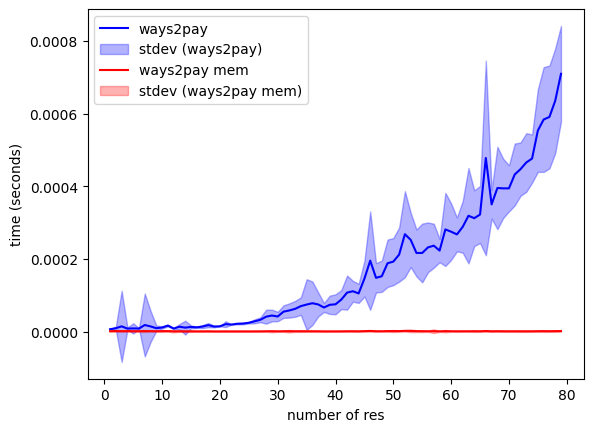

In [11]:
# Schrijf hier je code voor opgave 4. We hebben al een beginnetje voor je gemaakt, met de base cases:
def ways2pay(
    amount,
    highest_coupon_number=13,
    coupons=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
):
    if amount == 0:  # hij komt precies uit, één manier gevonden
        return 1
    elif amount < 0:  # oeps, teveel afgetrokken, deze manier kon niet
        return 0
    elif highest_coupon_number == 1:  # als er nog alleen 1-centjes over zijn kan het maar op 1 manier
        return 1
    return (ways2pay(amount, highest_coupon_number - 1) + ways2pay(amount - coupons[highest_coupon_number - 1], highest_coupon_number))


def ways2pay_memoized(amount, highest_coupon_number=13, coupons=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000], memo={}):
    if amount == 0:  
        return 1
    elif amount < 0:  
        return 0
    elif highest_coupon_number == 1:  
        return 1

    # Check if result is already in memo
    if (amount, highest_coupon_number) in memo:
        return memo[(amount, highest_coupon_number)]

    # Otherwise, compute the result and store it in memo
    result = ways2pay_memoized(amount, highest_coupon_number - 1, coupons, memo) + ways2pay_memoized(amount - coupons[highest_coupon_number - 1], highest_coupon_number, coupons, memo)
    memo[(amount, highest_coupon_number)] = result

    return result

assert ways2pay(5, 1) == 1, "oh oh, de base cases werken niet meer"
assert ways2pay(0, 5) == 1, "oh oh, de base cases werken niet meer"
assert ways2pay(-5, 1) == 0, "oh oh, de base cases werken niet meer"
assert ways2pay(7, 13) == 6, "7 kon op zes manieren; die moet nog gaan werken"

print(ways2pay_memoized(8))

mean_std_max = []
stdev_std_max = []
mean_my_max = []
stdev_my_max = []
meetpunten = list(range(1, 80))
for i in meetpunten:
    std = []
    my = []
    for j in range(200):  # 200 metingen per datapunt
        numb = i
        t1 = time.perf_counter()
        res = ways2pay(numb)
        t2 = time.perf_counter()
        std.append(t2 - t1)
        t1 = time.perf_counter()
        res = ways2pay_memoized(numb)
        t2 = time.perf_counter()
        my.append(t2 - t1)
    mean_std_max.append(stats.mean(std))
    stdev_std_max.append(stats.stdev(std))
    mean_my_max.append(stats.mean(my))
    stdev_my_max.append(stats.stdev(my))

# En dan de plot-code gemaakt met Matplotlib
# Zie bijvoorbeeld de tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(meetpunten, mean_std_max, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_std_max) - np.array(stdev_std_max),
    np.array(mean_std_max) + np.array(stdev_std_max),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_my_max, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_my_max) - np.array(stdev_my_max),
    np.array(mean_my_max) + np.array(stdev_my_max),
    color="r",
    alpha=0.3,
)
plt.xlabel("number of res")
plt.ylabel("time (seconds)")
plt.legend(["ways2pay", "stdev (ways2pay)", "ways2pay mem", "stdev (ways2pay mem)"], loc="upper left")
plt.show()
